In [ ]:
pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from sklearn.metrics import confusion_matrix
from category_encoders import BinaryEncoder

In [ ]:
df = pd.read_csv('/content/processed_dataframe.csv')
df

,CASE_STATUS,VISA_CLASS,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,...,AGENT_REPRESENTING_EMPLOYER,WORKSITE_CITY_1,WORKSITE_STATE_1,WAGE_RATE_OF_PAY_FROM_1,PREVAILING_WAGE_1,PW_WAGE_LEVEL_1,H-1B_DEPENDENT,WILLFUL_VIOLATOR,PUBLIC_DISCLOSURE,EMPLOYER_SIZE
0,DENIED,H-1B,ACCOUNT EXECUTIVE,ADVERTISING AND PROMOTIONS MANAGERS,1,1.0,0.0,0,0,0,...,1,DALLAS,TEXAS,65000.0,56202.0,1,0,0,1,1
1,DENIED,H-1B,PRODUCT VICE PRESIDENT,MARKETING MANAGERS,1,0.0,1.0,0,0,0,...,1,NEW YORK,NEW YORK,190000.0,195395.0,3,0,0,2,1
2,DENIED,H-1B,DIGITAL STRATEGIST,MARKETING MANAGERS,1,1.0,0.0,0,0,0,...,0,AUSTIN,CALIFORNIA,50000.0,68490.0,1,0,0,2,1
3,DENIED,H-1B,VP MARKETING (IMPORT/EXPORT),MARKETING MANAGERS,1,1.0,0.0,0,0,0,...,1,HIALEAH,FLORIDA,103000.0,102190.0,2,0,0,2,1
4,DENIED,H-1B,MARKETING MANAGERS,MARKETING MANAGERS,0,1.0,0.0,0,0,0,...,0,UPLAND,CALIFORNIA,76960.0,75379.2,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327107,CERTIFIED,H-1B,"CLIENT LEAD, INVESTOR RELATIONS (BIOTECHNOLOGY)",STATISTICAL ASSISTANTS,1,0.0,0.0,0,0,1,...,1,NEW YORK,NEW YORK,150000.0,61402.0,3,0,0,2,2
327108,CERTIFIED,H-1B,"CLIENT LEAD, INVESTOR RELATIONS (BIOTECHNOLOGY)",STATISTICAL ASSISTANTS,1,0.0,0.0,0,0,1,...,1,NEW YORK,NEW YORK,150000.0,55578.0,3,0,0,2,2
327109,CERTIFIED,H-1B,INSPECTOR III,CONSTRUCTION AND BUILDING INSPECTORS,1,0.0,1.0,0,0,0,...,1,NEW YORK,NEW YORK,71365.0,71365.0,3,0,0,2,2
327110,CERTIFIED,H-1B,SENIOR INVESTIGATOR AIR SAFETY,TRANSPORTATION INSPECTORS,1,0.0,1.0,0,0,0,...,1,LONG ISLAND CITY,NEW YORK,97850.0,74152.0,4,0,0,2,2


In [ ]:
df['EMPLOYER_SIZE'].value_counts()

1    173449
2    153663
Name: EMPLOYER_SIZE, dtype: int64

In [ ]:
unique_names = [
    'TEXAS', 'NEW YORK', 'CALIFORNIA', 'FLORIDA', 'MASSACHUSETTS', 'OREGON',
    'OKLAHOMA', 'GEORGIA', 'ILLINOIS', 'CONNECTICUT', 'MARYLAND', 'VIRGINIA',
    'PUERTO RICO', 'MICHIGAN', 'COLORADO', 'WASHINGTON', 'NORTH CAROLINA',
    'WEST VIRGINIA', 'UTAH', 'ARIZONA', 'LOUISIANA', 'NEW MEXICO', 'NEW JERSEY',
    'MINNESOTA', 'PENNSYLVANIA', 'NEVADA', 'SOUTH CAROLINA', 'TENNESSEE',
    'NEW HAMPSHIRE', 'OHIO', 'NORTH DAKOTA', 'DISTRICT OF COLUMBIA', 'ALABAMA',
    'IOWA', 'RHODE ISLAND', 'ALASKA', 'VERMONT', 'INDIANA', 'KENTUCKY', 'NEBRASKA',
    'MISSOURI', 'SOUTH DAKOTA', 'ARKANSAS', 'IDAHO', 'WISCONSIN', 'DELAWARE',
    'KANSAS', 'HAWAII', 'MONTANA', 'MISSISSIPPI', 'VIRGIN ISLANDS',
    'NORTHERN MARIANA ISLANDS', 'GUAM', 'MAINE', 'WYOMING', 'PALAU'
]

# Create a mapping from name to a unique number
name_to_number = {name: i+1 for i, name in enumerate(unique_names)}

# Replace the names in the DataFrame with the corresponding numbers
df['WORKSITE_STATE_1'] = df['WORKSITE_STATE_1'].replace(name_to_number)

# Now 'df' has the names replaced with numbers
df

,CASE_STATUS,VISA_CLASS,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,...,AGENT_REPRESENTING_EMPLOYER,WORKSITE_CITY_1,WORKSITE_STATE_1,WAGE_RATE_OF_PAY_FROM_1,PREVAILING_WAGE_1,PW_WAGE_LEVEL_1,H-1B_DEPENDENT,WILLFUL_VIOLATOR,PUBLIC_DISCLOSURE,EMPLOYER_SIZE
0,DENIED,H-1B,ACCOUNT EXECUTIVE,ADVERTISING AND PROMOTIONS MANAGERS,1,1.0,0.0,0,0,0,...,1,DALLAS,1,65000.0,56202.0,1,0,0,1,1
1,DENIED,H-1B,PRODUCT VICE PRESIDENT,MARKETING MANAGERS,1,0.0,1.0,0,0,0,...,1,NEW YORK,2,190000.0,195395.0,3,0,0,2,1
2,DENIED,H-1B,DIGITAL STRATEGIST,MARKETING MANAGERS,1,1.0,0.0,0,0,0,...,0,AUSTIN,3,50000.0,68490.0,1,0,0,2,1
3,DENIED,H-1B,VP MARKETING (IMPORT/EXPORT),MARKETING MANAGERS,1,1.0,0.0,0,0,0,...,1,HIALEAH,4,103000.0,102190.0,2,0,0,2,1
4,DENIED,H-1B,MARKETING MANAGERS,MARKETING MANAGERS,0,1.0,0.0,0,0,0,...,0,UPLAND,3,76960.0,75379.2,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327107,CERTIFIED,H-1B,"CLIENT LEAD, INVESTOR RELATIONS (BIOTECHNOLOGY)",STATISTICAL ASSISTANTS,1,0.0,0.0,0,0,1,...,1,NEW YORK,2,150000.0,61402.0,3,0,0,2,2
327108,CERTIFIED,H-1B,"CLIENT LEAD, INVESTOR RELATIONS (BIOTECHNOLOGY)",STATISTICAL ASSISTANTS,1,0.0,0.0,0,0,1,...,1,NEW YORK,2,150000.0,55578.0,3,0,0,2,2
327109,CERTIFIED,H-1B,INSPECTOR III,CONSTRUCTION AND BUILDING INSPECTORS,1,0.0,1.0,0,0,0,...,1,NEW YORK,2,71365.0,71365.0,3,0,0,2,2
327110,CERTIFIED,H-1B,SENIOR INVESTIGATOR AIR SAFETY,TRANSPORTATION INSPECTORS,1,0.0,1.0,0,0,0,...,1,LONG ISLAND CITY,2,97850.0,74152.0,4,0,0,2,2


In [ ]:
df['EMPLOYER_STATE'].unique()

array(['NY', 'TX', 'FL', 'CA', 'MA', 'OR', 'OK', 'CO', 'PA', 'VA', 'CT',
       'IL', 'MD', 'PR', 'GA', 'MI', 'WA', 'NC', 'WV', 'UT', 'MO', 'AZ',
       'LA', 'NM', 'KY', 'NJ', 'NV', 'DE', 'MN', 'ID', 'TN', 'OH', 'NH',
       'ND', 'DC', 'AL', 'IA', 'AK', 'VT', 'SC', 'IN', 'AR', 'KS', 'WI',
       'HI', 'NE', 'RI', 'MS', 'VI', 'MP', 'GU', 'ME', 'MT', 'WY'],
      dtype=object)

In [ ]:
states = ['NY', 'TX', 'FL', 'CA', 'MA', 'OR', 'OK', 'CO', 'PA', 'VA', 'CT',
          'IL', 'MD', 'PR', 'GA', 'MI', 'WA', 'NC', 'WV', 'UT', 'MO', 'AZ',
          'LA', 'NM', 'KY', 'NJ', 'NV', 'DE', 'MN', 'ID', 'TN', 'OH', 'NH',
          'ND', 'DC', 'AL', 'IA', 'AK', 'VT', 'SC', 'IN', 'AR', 'KS', 'WI',
          'HI', 'NE', 'RI', 'MS', 'VI', 'MP', 'GU', 'ME', 'MT', 'WY']

state_mapping = {state: i+1 for i, state in enumerate(states)}
df['EMPLOYER_STATE'] = df['EMPLOYER_STATE'].map(state_mapping)
print(df['EMPLOYER_STATE'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54]


In [ ]:
df = df.drop(columns=['VISA_CLASS'])

In [ ]:
df = df.iloc[:15000]
df

,CASE_STATUS,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,...,AGENT_REPRESENTING_EMPLOYER,WORKSITE_CITY_1,WORKSITE_STATE_1,WAGE_RATE_OF_PAY_FROM_1,PREVAILING_WAGE_1,PW_WAGE_LEVEL_1,H-1B_DEPENDENT,WILLFUL_VIOLATOR,PUBLIC_DISCLOSURE,EMPLOYER_SIZE
0,DENIED,ACCOUNT EXECUTIVE,ADVERTISING AND PROMOTIONS MANAGERS,1,1.0,0.0,0,0,0,0,...,1,DALLAS,1,65000.00,56202.0,1,0,0,1,1
1,DENIED,PRODUCT VICE PRESIDENT,MARKETING MANAGERS,1,0.0,1.0,0,0,0,0,...,1,NEW YORK,2,190000.00,195395.0,3,0,0,2,1
2,DENIED,DIGITAL STRATEGIST,MARKETING MANAGERS,1,1.0,0.0,0,0,0,0,...,0,AUSTIN,3,50000.00,68490.0,1,0,0,2,1
3,DENIED,VP MARKETING (IMPORT/EXPORT),MARKETING MANAGERS,1,1.0,0.0,0,0,0,0,...,1,HIALEAH,4,103000.00,102190.0,2,0,0,2,1
4,DENIED,MARKETING MANAGERS,MARKETING MANAGERS,0,1.0,0.0,0,0,0,0,...,0,UPLAND,3,76960.00,75379.2,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,CERTIFIED,PRODUCT EXPERIENCE PROGRAM MANAGER,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,1,1.0,0.0,0,0,0,0,...,1,MOUNTAIN VIEW,3,127751.24,102502.0,3,1,0,2,1
14996,CERTIFIED,USER ACQUISITION SPECIALIST,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,1,1.0,0.0,0,0,0,0,...,1,CULVER CITY,3,75000.00,71198.0,3,0,0,2,1
14997,CERTIFIED,PRODUCT MANAGER,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,1,1.0,0.0,0,0,0,0,...,1,SAN FRANCISCO,3,160000.00,116792.0,4,0,0,2,1
14998,CERTIFIED,MARKETING SPECIALIST,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,1,1.0,0.0,0,0,0,0,...,1,HERNDON,12,50400.00,44824.0,1,1,0,2,1


In [ ]:
df['CASE_STATUS'].value_counts()

CERTIFIED    324915
DENIED         2197
Name: CASE_STATUS, dtype: int64

In [ ]:
encoder = BinaryEncoder(cols=['SOC_TITLE'])
df_2 = encoder.fit_transform(df_2)

In [ ]:
# Select rows where EMPLOYER_SIZE is 1
df_employer_size_1 = df[df['EMPLOYER_SIZE'] == 1]

# Select rows where EMPLOYER_SIZE is not 1
df_employer_size_not_1 = df[df['EMPLOYER_SIZE'] != 1]


In [ ]:
df_employer_size_1 = df_employer_size_1.drop(columns=['JOB_TITLE','WORKSITE_CITY_1','EMPLOYER_NAME'])

In [ ]:
df_employer_size_1 = df_employer_size_1.drop(columns=['EMPLOYER_CITY'])

In [ ]:
df_employer_size_1.to_csv('df_employer_size_1.csv', index=False)

# Download the file
files.download('df_employer_size_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_2 = pd.read_csv('/content/df_employer_size_1.csv')
df_2

,CASE_STATUS,SOC_TITLE,FULL_TIME_POSITION,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,WORKSITE_STATE_1,WAGE_RATE_OF_PAY_FROM_1,PREVAILING_WAGE_1,PW_WAGE_LEVEL_1,H-1B_DEPENDENT,WILLFUL_VIOLATOR,PUBLIC_DISCLOSURE,EMPLOYER_SIZE
0,DENIED,ADVERTISING AND PROMOTIONS MANAGERS,1,1.0,0.0,0,0,0,0,1,1,1,65000.0,56202.0,1,0,0,1,1
1,DENIED,MARKETING MANAGERS,1,0.0,1.0,0,0,0,0,1,1,2,190000.0,195395.0,3,0,0,2,1
2,DENIED,MARKETING MANAGERS,1,1.0,0.0,0,0,0,0,2,0,3,50000.0,68490.0,1,0,0,2,1
3,DENIED,MARKETING MANAGERS,1,1.0,0.0,0,0,0,0,3,1,4,103000.0,102190.0,2,0,0,2,1
4,DENIED,MARKETING MANAGERS,0,1.0,0.0,0,0,0,0,4,0,3,76960.0,75379.2,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173444,CERTIFIED,STATISTICAL ASSISTANTS,1,0.0,1.0,0,0,0,0,35,1,32,60000.0,58802.0,4,0,0,2,1
173445,CERTIFIED,"OFFICE AND ADMINISTRATIVE SUPPORT WORKERS, ALL...",1,1.0,0.0,0,0,0,0,5,0,5,42960.0,41954.0,2,0,0,1,1
173446,CERTIFIED,CONSTRUCTION AND BUILDING INSPECTORS,1,1.0,0.0,0,0,0,0,1,0,12,62400.0,55182.0,2,0,0,2,1
173447,CERTIFIED,JEWELERS AND PRECIOUS STONE AND METAL WORKERS,1,1.0,0.0,0,0,0,0,42,1,43,80000.0,55453.0,4,0,0,2,1


In [ ]:
df_2 =

In [ ]:
df_employer_size_1 = df_employer_size_1.drop(columns=['EMPLOYER_NAME','JOB_TITLE','EMPLOYER_CITY','WORKSITE_CITY_1'])


KeyError: "['EMPLOYER_NAME', 'JOB_TITLE', 'EMPLOYER_CITY', 'WORKSITE_CITY_1'] not found in axis"

In [ ]:
X = df_2_final.drop('CASE_STATUS', axis=1)
y = df_2_final['CASE_STATUS']

In [ ]:
X

,SOC_TITLE_0,SOC_TITLE_1,SOC_TITLE_2,SOC_TITLE_3,SOC_TITLE_4,SOC_TITLE_5,SOC_TITLE_6,SOC_TITLE_7,SOC_TITLE_8,FULL_TIME_POSITION,...,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,WORKSITE_STATE_1,WAGE_RATE_OF_PAY_FROM_1,PREVAILING_WAGE_1,PW_WAGE_LEVEL_1,H-1B_DEPENDENT,WILLFUL_VIOLATOR,PUBLIC_DISCLOSURE,EMPLOYER_SIZE
0,0,0,0,0,0,0,0,0,1,1,...,1,1,1,65000.0,56202.0,1,0,0,1,1
1,0,0,0,0,0,0,0,1,0,1,...,1,1,2,190000.0,195395.0,3,0,0,2,1
2,0,0,0,0,0,0,0,1,0,1,...,2,0,3,50000.0,68490.0,1,0,0,2,1
3,0,0,0,0,0,0,0,1,0,1,...,3,1,4,103000.0,102190.0,2,0,0,2,1
4,0,0,0,0,0,0,0,1,0,0,...,4,0,3,76960.0,75379.2,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,1,1,1,0,0,1,1,...,4,1,43,80000.0,65603.0,2,1,0,2,1
9996,0,0,0,1,1,0,1,1,0,1,...,2,0,17,78562.0,78562.0,2,1,0,2,1
9997,0,0,0,1,1,0,1,1,0,1,...,2,0,3,86112.0,86112.0,2,1,0,2,1
9998,0,0,0,1,1,0,1,1,0,1,...,2,0,25,81286.0,81286.0,2,1,0,2,1


In [ ]:
status_mapping = {'CERTIFIED': 1, 'DENIED': 0}

# Use the replace method to apply the mapping
df_2['CASE_STATUS'] = df_2['CASE_STATUS'].replace(status_mapping)
df_2 = df_2.replace(status_mapping)

In [ ]:
df_2['CASE_STATUS'].value_counts()

1    171928
0      1521
Name: CASE_STATUS, dtype: int64

In [ ]:
df_2

,CASE_STATUS,JOB_TITLE_0,JOB_TITLE_1,JOB_TITLE_2,JOB_TITLE_3,JOB_TITLE_4,JOB_TITLE_5,JOB_TITLE_6,JOB_TITLE_7,JOB_TITLE_8,...,WORKSITE_CITY_1_10,WORKSITE_CITY_1_11,WORKSITE_STATE_1,WAGE_RATE_OF_PAY_FROM_1,PREVAILING_WAGE_1,PW_WAGE_LEVEL_1,H-1B_DEPENDENT,WILLFUL_VIOLATOR,PUBLIC_DISCLOSURE,EMPLOYER_SIZE
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,65000,56202,1,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,2,190000,195395,3,0,0,2,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,3,50000,68490,1,0,0,2,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,4,103000,102190,2,0,0,2,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,3,76960,75379,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10671,1,1,0,0,1,0,0,1,1,1,...,1,1,3,130000,109242,2,0,0,2,2
10672,1,0,0,1,0,0,0,0,0,0,...,0,0,9,114000,113630,4,0,0,2,2
10673,1,0,0,0,1,1,0,0,0,1,...,1,0,2,106371,106371,2,0,0,2,1
10674,1,0,1,0,1,0,0,0,1,0,...,0,0,32,47008,38480,1,0,0,2,1


In [ ]:
import pandas as pd

# Filter all rows where CASE_STATUS = 0
df_case_0 = df_2[df_2['CASE_STATUS'] == 0]

# Filter rows where CASE_STATUS = 1 and randomly sample 8479 instances
df_case_1_sample = df_2[df_2['CASE_STATUS'] == 1].sample(n=8479, random_state=42)  # Adjust random_state for reproducibility

# Concatenate the two DataFrames to create df_2
df_2_final = pd.concat([df_case_0, df_case_1_sample], ignore_index=True)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOC_TITLE_0                  10000 non-null  int64  
 1   SOC_TITLE_1                  10000 non-null  int64  
 2   SOC_TITLE_2                  10000 non-null  int64  
 3   SOC_TITLE_3                  10000 non-null  int64  
 4   SOC_TITLE_4                  10000 non-null  int64  
 5   SOC_TITLE_5                  10000 non-null  int64  
 6   SOC_TITLE_6                  10000 non-null  int64  
 7   SOC_TITLE_7                  10000 non-null  int64  
 8   SOC_TITLE_8                  10000 non-null  int64  
 9   FULL_TIME_POSITION           10000 non-null  int64  
 10  NEW_EMPLOYMENT               10000 non-null  float64
 11  CONTINUED_EMPLOYMENT         10000 non-null  float64
 12  CHANGE_PREVIOUS_EMPLOYMENT   10000 non-null  int64  
 13  NEW_CONCURRENT_EM

In [ ]:
# Perform the stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the balance in the training set
print('Training set:')
print(y_train.value_counts(normalize=True))

# Check the balance in the testing set
print('Testing set:')
print(y_test.value_counts(normalize=True))

Training set:
1    0.847875
0    0.152125
Name: CASE_STATUS, dtype: float64
Testing set:
1    0.848
0    0.152
Name: CASE_STATUS, dtype: float64


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOC_TITLE_0                  10000 non-null  int64  
 1   SOC_TITLE_1                  10000 non-null  int64  
 2   SOC_TITLE_2                  10000 non-null  int64  
 3   SOC_TITLE_3                  10000 non-null  int64  
 4   SOC_TITLE_4                  10000 non-null  int64  
 5   SOC_TITLE_5                  10000 non-null  int64  
 6   SOC_TITLE_6                  10000 non-null  int64  
 7   SOC_TITLE_7                  10000 non-null  int64  
 8   SOC_TITLE_8                  10000 non-null  int64  
 9   FULL_TIME_POSITION           10000 non-null  int64  
 10  NEW_EMPLOYMENT               10000 non-null  float64
 11  CONTINUED_EMPLOYMENT         10000 non-null  float64
 12  CHANGE_PREVIOUS_EMPLOYMENT   10000 non-null  int64  
 13  NEW_CONCURRENT_EM

In [ ]:
df_2_final['NEW_EMPLOYMENT'].fillna(0, inplace=True)
df_2_final['CONTINUED_EMPLOYMENT'].fillna(0, inplace=True)


In [ ]:
# Fill NaN values in the specific columns
columns_to_check = ['NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT']

# Check for NaN values in specific columns
nan_in_specific_cols = X_train[columns_to_check].isna().any()

# Print specific columns with NaN values
print("Specific columns with NaN values:", nan_in_specific_cols[nan_in_specific_cols].index.tolist())


Specific columns with NaN values: ['NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT']


In [ ]:
print(df_2_final[['NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT']].isna().any())


NEW_EMPLOYMENT          False
CONTINUED_EMPLOYMENT    False
dtype: bool


In [ ]:
df_2_final

,CASE_STATUS,SOC_TITLE_0,SOC_TITLE_1,SOC_TITLE_2,SOC_TITLE_3,SOC_TITLE_4,SOC_TITLE_5,SOC_TITLE_6,SOC_TITLE_7,SOC_TITLE_8,...,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,WORKSITE_STATE_1,WAGE_RATE_OF_PAY_FROM_1,PREVAILING_WAGE_1,PW_WAGE_LEVEL_1,H-1B_DEPENDENT,WILLFUL_VIOLATOR,PUBLIC_DISCLOSURE,EMPLOYER_SIZE
0,0,0,0,0,0,0,0,0,0,1,...,1,1,1,65000,56202,1,0,0,1,1
1,0,0,0,0,0,0,0,0,1,0,...,1,1,2,190000,195395,3,0,0,2,1
2,0,0,0,0,0,0,0,0,1,0,...,2,0,3,50000,68490,1,0,0,2,1
3,0,0,0,0,0,0,0,0,1,0,...,3,1,4,103000,102190,2,0,0,2,1
4,0,0,0,0,0,0,0,0,1,0,...,4,0,3,76960,75379,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,1,1,1,0,0,1,...,4,1,43,80000,65603,2,1,0,2,1
9996,1,0,0,0,1,1,0,1,1,0,...,2,0,17,78562,78562,2,1,0,2,1
9997,1,0,0,0,1,1,0,1,1,0,...,2,0,3,86112,86112,2,1,0,2,1
9998,1,0,0,0,1,1,0,1,1,0,...,2,0,25,81286,81286,2,1,0,2,1


In [ ]:
df_2_final['NEW_EMPLOYMENT'] = df_2_final['NEW_EMPLOYMENT'].astype(int)
df_2_final['CONTINUED_EMPLOYMENT'] = df_2_final['CONTINUED_EMPLOYMENT'].astype(int)


In [ ]:
df_2_final['WAGE_RATE_OF_PAY_FROM_1'] = df_2_final['WAGE_RATE_OF_PAY_FROM_1'].astype(int)
df_2_final['PREVAILING_WAGE_1'] = df_2_final['PREVAILING_WAGE_1'].astype(int)

In [ ]:
X.to_csv('X.csv', index=False)
y.to_csv('y.csv', index=False)

from google.colab import files
files.download('X.csv')
files.download('y.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X = X.drop(columns=['EMPLOYER_SIZE'])

In [ ]:
X_train = X_train.drop(columns=['EMPLOYER_SIZE'])
X_test = X_test.drop(columns=['EMPLOYER_SIZE'])

In [ ]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": make_pipeline(StandardScaler(), SVC()),  # SVMs benefit from data scaling
    "GBM": GradientBoostingClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='binary')
    print(f"{name} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")

# ANN
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Preparing the data for ANN (ensure input data is scaled)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the ANN
ann = build_model(X_train_scaled.shape[1])
ann.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=0)

# Evaluate the ANN
loss, accuracy = ann.evaluate(X_test_scaled, y_test, verbose=0)
predictions = (ann.predict(X_test_scaled) > 0.5).astype(int)
f1 = f1_score(y_test, predictions, average='binary')
print(f"ANN - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")


Logistic Regression - Accuracy: 0.1520, F1-Score: 0.0000
Random Forest - Accuracy: 0.8785, F1-Score: 0.9305
KNN - Accuracy: 0.8505, F1-Score: 0.9158
SVM - Accuracy: 0.8710, F1-Score: 0.9283
GBM - Accuracy: 0.8740, F1-Score: 0.9293
63/63 [==============================] - 0s 2ms/step
ANN - Accuracy: 0.8665, F1-Score: 0.9231


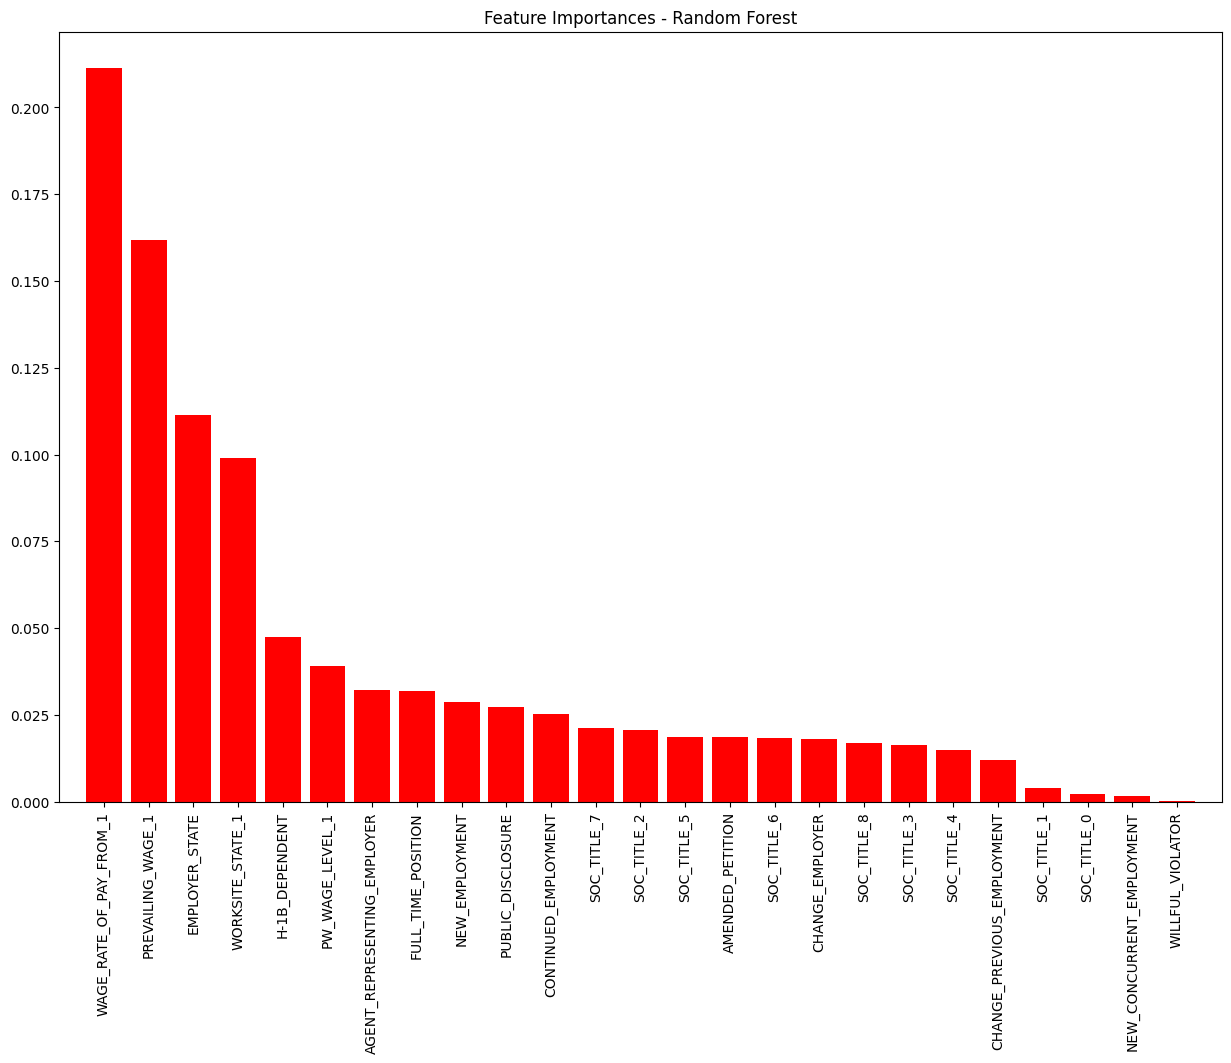

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are your training data and labels
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

# Plot
plt.figure(figsize=(15, 10))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_rf], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


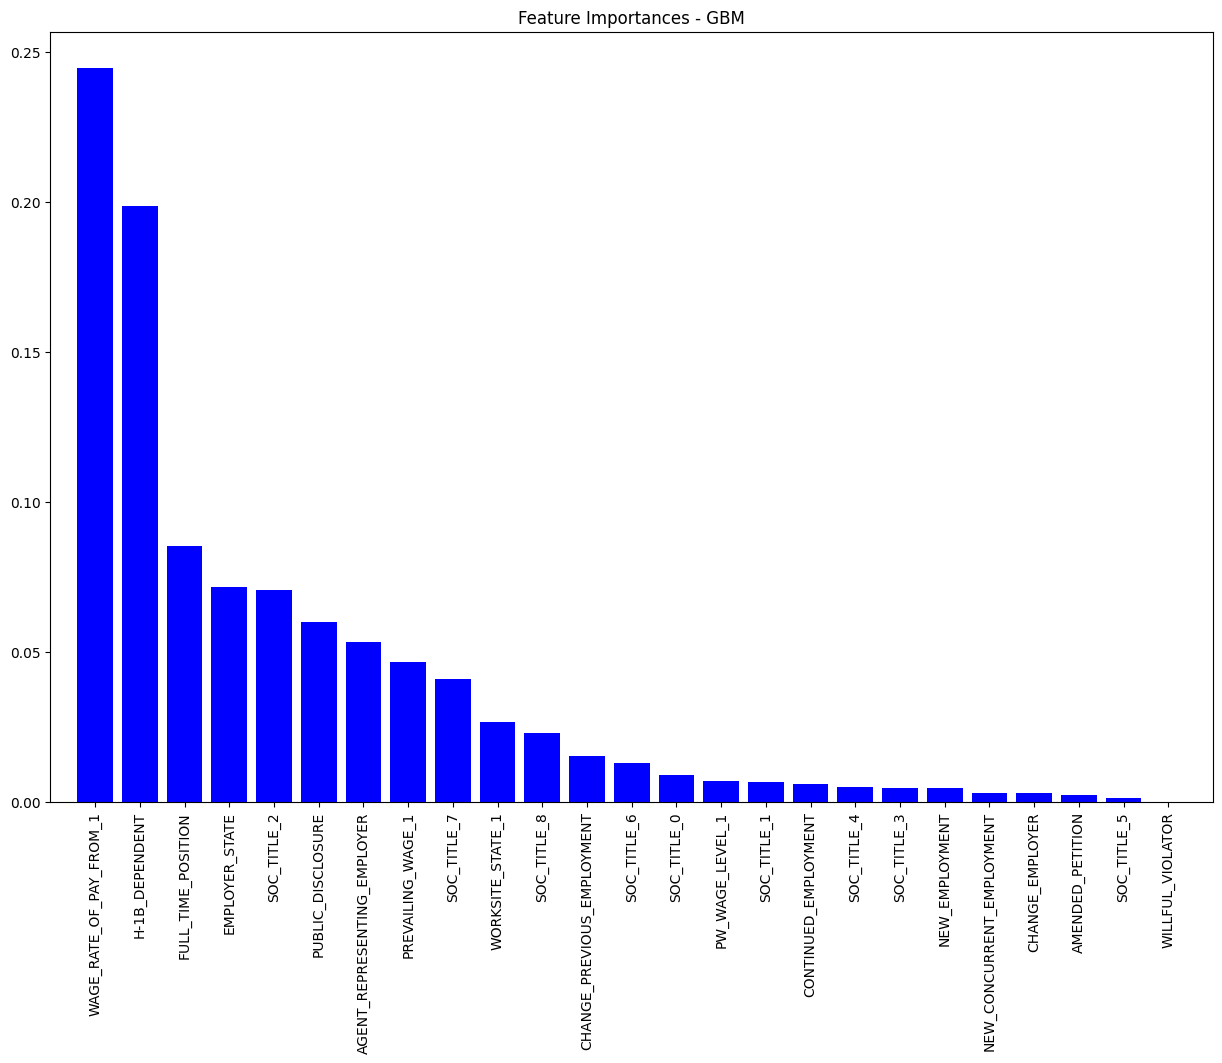

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm.fit(X_train, y_train)

importances_gbm = gbm.feature_importances_
indices_gbm = np.argsort(importances_gbm)[::-1]

# Plot
plt.figure(figsize=(15, 10))
plt.title("Feature Importances - GBM")
plt.bar(range(X_train.shape[1]), importances_gbm[indices_gbm],
        color="b", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_gbm], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


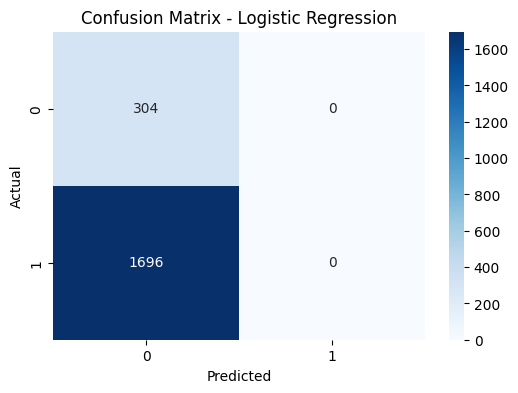

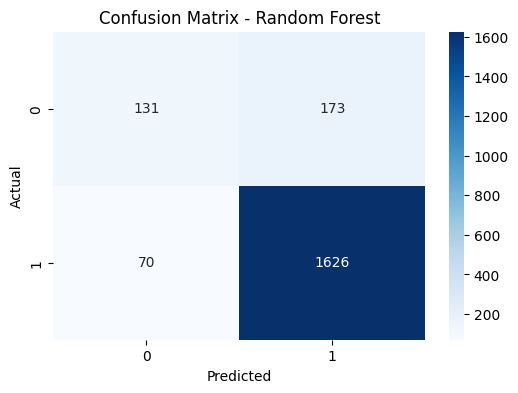

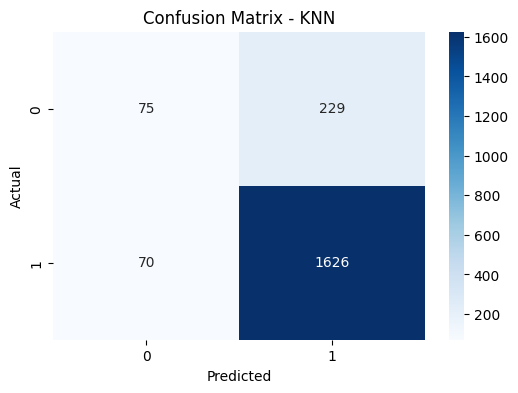

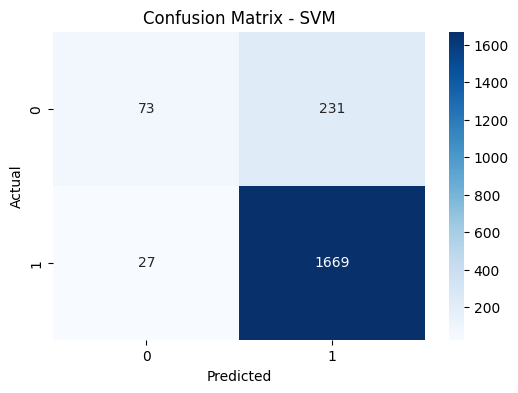

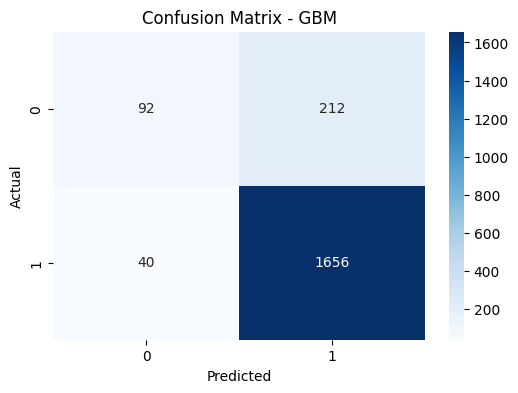

63/63 [==============================] - 0s 2ms/step


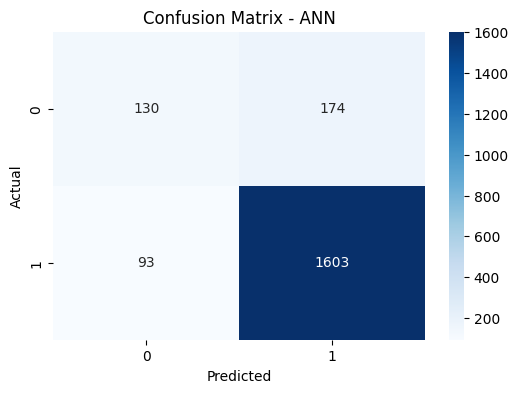

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Logistic Regression
y_pred_lr = models['Logistic Regression'].predict(X_test)
plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression')

# Random Forest
y_pred_rf = models['Random Forest'].predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

# KNN
y_pred_knn = models['KNN'].predict(X_test)
plot_confusion_matrix(y_test, y_pred_knn, 'KNN')

# SVM
y_pred_svm = models['SVM'].predict(X_test)
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')

# GBM
y_pred_gbm = models['GBM'].predict(X_test)
plot_confusion_matrix(y_test, y_pred_gbm, 'GBM')

# ANN
y_pred_ann = (ann.predict(X_test_scaled) > 0.5).astype(int)
plot_confusion_matrix(y_test, y_pred_ann, 'ANN')